# Linear Regression Gradient Descent Hardcoded
In this notebook, we are going to hardcode the linear regression algorithm with gradient descent (no use of libraries like scikit-learn and such).

## Imports + comfigurations
In here, we are going to import our dependencies.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import clear_output
from IPython.display import Image
import pickle
import logging
import time
import random
from enum import Enum

We now configure the logger.

In [2]:
# we define our log repository
LOG_REPOSITORY = "./logs/"

# and we configure our logger
logging.basicConfig(filename = LOG_REPOSITORY + 'linear-regression-GradientDescent-Hardcoded.log', 
                    format='%(asctime)s [%(levelname)s]: %(message)s', 
                    level=logging.DEBUG)


In here, we import our data.<br>
The dataset represents the changes in temperature during the world war 2.<br>
I got the data from kaggle: __[Weather World War 2](https://www.kaggle.com/smid80/weatherww2)__.

In [3]:
data = pd.read_csv("datasets/weather_ww2/Summary of Weather.csv", delimiter=',', low_memory=False)
data.fillna(0,inplace=True)
data = data.sample(frac=1)
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
53494,22502,1943-3-29,0,0.0,25.555556,19.444444,22.222222,0,0,43,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
6246,10505,1945-9-8,0,0.0,33.333333,21.111111,27.222222,0,0,45,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
44223,16202,1942-1-13,0,0.0,0.000000,-1.111111,-0.555556,0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
57844,22507,1945-10-29,1.778,0.0,28.888889,20.000000,24.444444,0,1,45,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
29665,11801,1944-3-11,0,0.0,32.222222,22.222222,27.222222,0,0,44,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,...,119040.0,119040.0,119040.0,119040.0,119040.000000,119040.0,119040.0,119040.0,119040.0,119040.0
mean,29659.435795,0.168818,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,0.120884,0.091154,...,0.0,0.0,0.0,0.0,0.053300,0.0,0.0,0.0,0.0,0.0
std,20953.209402,2.611819,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,2.069915,1.410269,...,0.0,0.0,0.0,0.0,0.886512,0.0,0.0,0.0,0.0,0.0
min,10001.000000,0.000000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11801.000000,0.000000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
50%,22508.000000,0.000000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
75%,33501.000000,0.000000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,0.0,0.0,0.0,0.0,23.900000,0.0,0.0,0.0,0.0,0.0


## Representing the data
Now we select the rows we are going to use.

In [5]:
columns = ['MaxTemp','MinTemp']
filteredColumns = data[columns]
filteredColumns.describe()

,MaxTemp,MinTemp
count,119040.000000,119040.000000
mean,27.045111,17.789511
std,8.717817,8.334572
min,-33.333333,-38.333333
25%,25.555556,15.000000
50%,29.444444,21.111111
75%,31.666667,23.333333
max,50.000000,34.444444


We print a plot graph representing the data.

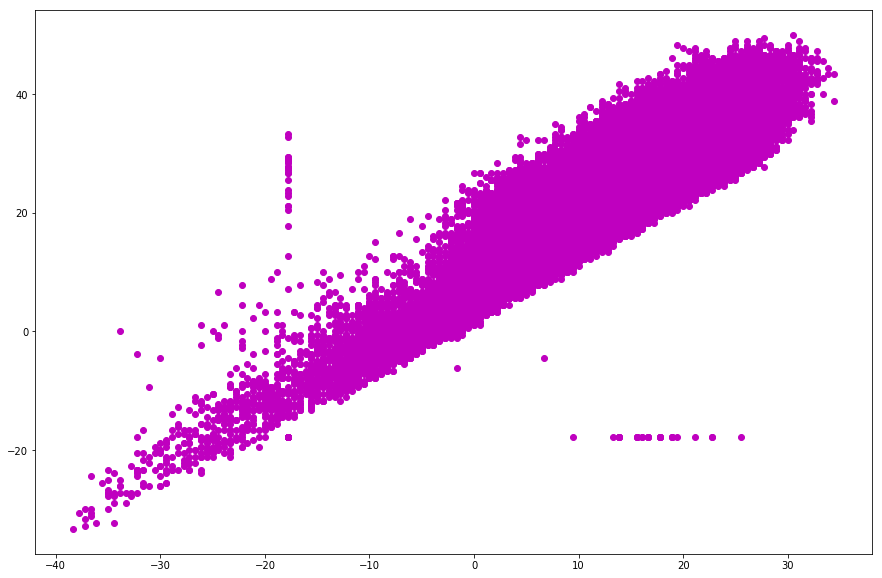

In [6]:
plt.figure(figsize=(15,10))
x = filteredColumns['MinTemp']
y = filteredColumns['MaxTemp']
plt.plot(x,y,'mo')

## Simple linear regression using Gradient Descent
We first declare our Error function. We are going to use the __[Mean Squared Error(MSE)](https://en.wikipedia.org/wiki/Mean_squared_error)__ to evaluate our prediction.<br>
The Mean Squared Error equation is:<br>
$$
\begin{align*}
MSE &= \frac{1}{N}\sum_{i=1}^N(Y_i - \hat{Y})^2
\end{align*}
$$

In [7]:
# Calculate mean squared error
def mean_squared_error(actual_values, predicted_values):
    sum_value = .0
    for i in range(len(actual_values)):
        sum_value += ((predicted_values[i] - actual_values[i]) ** 2)
        
    return sum_value/float(len(actual_values))

### Implementation of gradient descent
First of all, we need to explain what's __gradient descent__. Simply put, it's a method to find the lowest Y value for a given function. In our case, we need to __minimize__ the __Mean Squared Error__ function to find the best line that fits our data. <br><br>
To do that, we need to calculate the __partial derivative__ of our function with respect to both m and b. As we know, a 0 derivative means that we are either in a local minima, or a local maxima. Which means that __the closer we get to 0 the better__.<br><br>
The equation of our line:
$$
\begin{align*}
Y &= mX + b \\
\end{align*}
$$
<br>
The __Mean Squared Error__ function after we replace $\hat{Y}$ with the function:
$$
\begin{align*}
MSE &= \frac{1}{n}\sum_{i=1}^N(Y_i - (mX_i + b))^2
\end{align*}
$$
<br>
Now we calculate the __partial derivative__ of our __Mean Squared Error__ function: <br><br>
$$
\begin{align*}
\frac{\partial}{\partial m} &= \frac{2}{N}\sum_{i=1}^N-X_i(Y_i-(mX_i + b)) \\\\
\frac{\partial}{\partial b} &= \frac{2}{N}\sum_{i=1}^N-(Y_i-(mX_i + b))
\end{align*}
$$
<br>
The process of finding the optimal values for m and b is to then __minimize__ our derivatives. To do that we use the __gradient descent__ formula:
$$
\begin{align*}
a_{n+1} &= a_{n} - \gamma \frac{\partial}{\partial a_{n}}f(a_n)
\end{align*}
$$
Where:<br>
$\gamma$ : the learning rate<br>
$a_{n+1}$ : the new value<br>
$a_n$ : the old value<br>
$f(a_n)$ : the function we are looking to minimize
<br><br>
Sources: 
* https://towardsdatascience.com/linear-regression-using-gradient-descent-in-10-lines-of-code-642f995339c0
* https://www.youtube.com/watch?v=umAeJ7LMCfU
* https://medium.com/meta-design-ideas/linear-regression-by-using-gradient-descent-algorithm-your-first-step-towards-machine-learning-a9b9c0ec41b1

In [8]:
# calculate the gradient of one step
def step_gradient(x,y,b_current=0,m_current=0,learning_rate=.0001):
    N = float(len(x))
    m_gradient = 0
    b_gradient = 0
    for i in range(len(x)):
        b_gradient += -(2/N) * (y[i] - (m_current * x[i] + b_current))
        m_gradient += -(2/N) * x[i] * (y[i] - (m_current * x[i] + b_current))
    b_next = b_current - (learning_rate * b_gradient)
    m_next = m_current - (learning_rate * m_gradient)
    return b_next , m_next

In here, we are creating the gradient descent runner.

In [9]:
# function to delete then print in a jupyter notebook
def only_print(text):
    clear_output()
    print(text)

# enumeartion for types of gradient descent
class GradientDescentTypes(Enum):
    Batch = 1
    Stochastic = 2
    MiniBatch = 3
    
# get a sample of the data
def get_sample(x,y,size,shuffle=False):
    if shuffle:
        c = list(zip(x, y))
        random.shuffle(c)
        x, y = zip(*c)
    
    x = pd.Series(list(x))
    y = pd.Series(list(y))
    
    x = x.iloc[:size]
    y = y.iloc[:size]
    
    x.index = range(size)
    y.index = range(size)
    
    return x, y
    
# function to run gradient descent for n iterations
def gradient_descent_runner(x,y,b_start=0,m_start=0,learning_rate=.0001,num_iteration=1000, 
                            learning_method=GradientDescentTypes.Batch, batch_size=256):
    b_now = b_start
    m_now = m_start
    mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
    predictions = [[b_now,m_now,mse]]
    if(learning_method is GradientDescentTypes.Batch):
        for i in range(num_iteration):
            b_now, m_now = step_gradient(x,y,b_now,m_now,learning_rate)
            mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
            predictions.append([b_now,m_now,mse])
            only_print("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
            logging.info("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
        return predictions
        
    elif(learning_method is GradientDescentTypes.Stochastic):
        for i in range(num_iteration):
            shuffle_x, shuffle_y = get_sample(x,y,1,shuffle=True)
            b_now, m_now = step_gradient(shuffle_x,shuffle_y,b_now,m_now,learning_rate)
            mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
            predictions.append([b_now,m_now,mse])
            only_print("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
            logging.info("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
        return predictions
        
    elif(learning_method is GradientDescentTypes.MiniBatch):
        for i in range(num_iteration):
            shuffle_x, shuffle_y = get_sample(x,y,batch_size,shuffle=True)
            b_now, m_now = step_gradient(shuffle_x,shuffle_y,b_now,m_now,learning_rate)
            mse = mean_squared_error(y, compute_linear_y_values(x,b_now, m_now))
            predictions.append([b_now,m_now,mse])
            only_print("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
            logging.info("[b = {}, m = {}, mse = {}, iteration = {}]".format(b_now,m_now,mse,i))
        return predictions
    else:
        return []

We declare a function to split our data as training and testing.

In [10]:
# function for splitting the data into training and testing
def split_data(x,train_split_rate = .5):
    train_x = x.iloc[:int(round(len(x)*train_split_rate))]
    test_x = x.iloc[int(round(len(x)*train_split_rate)):]
    
    train_x.index = range(len(train_x))
    test_x.index = range(len(test_x))
    
    return train_x, test_x

Now we define our starting values of m, b, learning_rate and the epochs (how many iterations to do).

In [11]:
# hyperparameters
epochs = 100
b_start = 0
m_start = 0
learning_rate = .0005

We split our data.

In [12]:
# splitting the data
train_data, test_data = split_data(data,train_split_rate=.5)
train_x, test_x = train_data['MinTemp'], test_data['MinTemp']
train_y, test_y = train_data['MaxTemp'], test_data['MaxTemp']

now we declare a function that calculates the y values based on m, b and X values.

In [13]:
def compute_linear_y_values(x,b = 0,m = 0):
    result = b + (m * x)
    return result

We declare some methods for saving and getting the data from a file with __[pickle](https://docs.python.org/3/library/pickle.html#data-stream-format)__.

In [14]:
# we define our save repository
SAVE_REPOSITORY = "./data_saves/linear-regression-GradientDescent-Hardcoded/"

# function to save data into a file
def save_to_file(filename,data):
    with open(SAVE_REPOSITORY + filename, 'wb') as fp:
        pickle.dump(data, fp)
        
# function to get data from a file
def get_from_file(filename):
    with open (SAVE_REPOSITORY + filename, 'rb') as fp:
        return pickle.load(fp)


We now compute our predictions.

In [15]:
predictions = gradient_descent_runner(train_x,train_y,b_start,m_start,learning_rate,epochs)

# if you want to load a saved data just execute the following
# predictions = get_from_file('prediction_array.pkl')

[b = 0.25101275982030513, m = 1.3999580953719957, mse = 36.33722584468994, iteration = 99]


And we save the data into a file.

In [16]:
save_to_file('prediction1_array.pkl', predictions)

This part is dedicated for the animation of gradient descent linear regression algorithm.

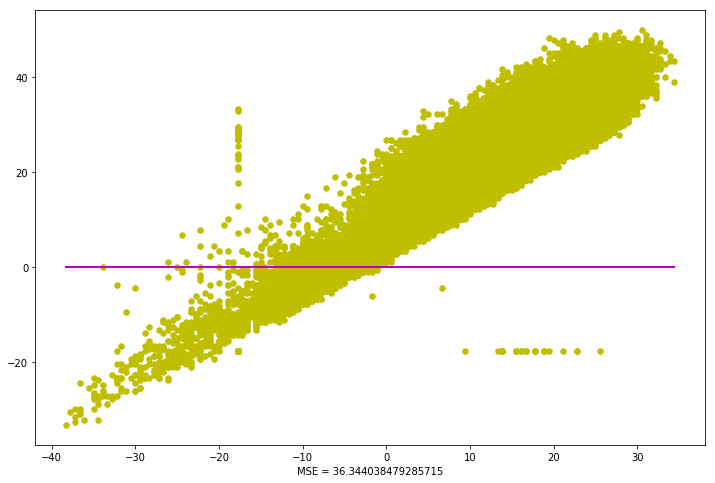

In [17]:

# plot parameters
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x,y,color = "y", marker = "o", s = 30)
x_line = pd.Series([min(train_x),max(train_x)])
x_line.index = range(int(len(x_line)))
ln, = ax.plot(x_line, compute_linear_y_values(x_line,b_start,m_start), color = "m", linewidth=2, animated = True)

# initialisation of plot data
def init_function():
    ln.set_data(x_line, compute_linear_y_values(x_line,b_start,m_start))
    #predictions = gradient_descent_runner(x,y,b_start,m_start,learning_rate,epochs)
    return ln,
    
# the update function of our animation
def update_function(frame):
    y_predicted = compute_linear_y_values(x_line,predictions[frame][0], predictions[frame][1])
    ln.set_ydata(y_predicted)
    #mse = mean_squared_error(train_y, y_predicted)
    ax.set_xlabel("MSE = {}".format(predictions[frame][2]))
    return ln,

anim = FuncAnimation(fig, update_function, epochs, blit=False, interval=1,
                              repeat=True, init_func=init_function)

#save the plot as a gif
anim.save('./animations/linear-regression-GradientDescent-Hardcoded_3.gif', dpi=80, writer='imagemagick')

clear_output()

And lastly, we print the result as a gif.<br>
<img src="./animations/linear-regression-GradientDescent-Hardcoded_3.gif" />

In [18]:
# print the result in a gif format
#with open('./animations/linear-regression-GradientDescent-Hardcoded_3.gif','rb') as f:
#    display(Image(data=f.read(), format='gif'))

We print now the Mean Squared Error.

In [19]:
max_index = int(len(predictions)-1)
last_b, last_m = predictions[max_index][0], predictions[max_index][1]
test_result = compute_linear_y_values(test_x,last_b,last_m)
mse = mean_squared_error(test_y, test_result)
print("Testing MSE = {}".format(mse))

Testing MSE = 37.693743514445295


Lastly, we print a plot representing our loss function.

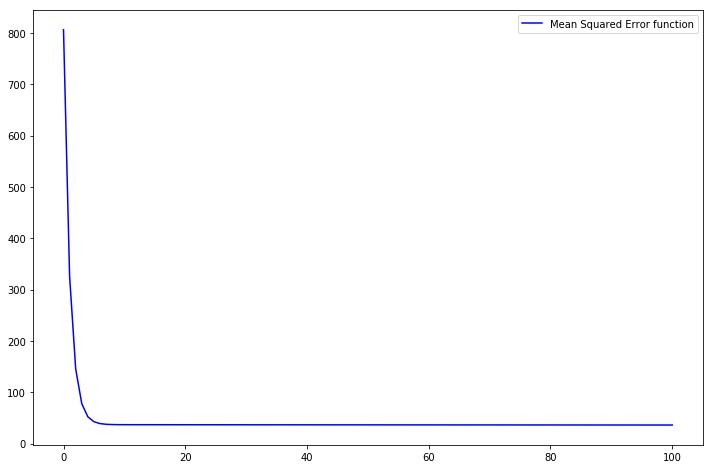

In [20]:
plt.subplots(figsize=(12,8))
x_values = [i for i in range(len(predictions))]
y_values = [m[2] for m in predictions]
plt.plot(x_values, y_values, color = "b", label="Mean Squared Error function")
plt.legend()
plt.show()


In [21]:
# print(predictions)

In here, we analyse the difference between the different types of gradient descent.<br>
So first, we execute our 3 algorithms while calculating the time passed on each of them.<br><br>
We begin with the batch method which uses all the data as input (test data). This one is really slow and don't scale well if we have a massive data.<br>
The second one is the stochastic approche. It consists of picking up a point at random of our test data and try to optimize our model using that point. and repeat that process. This approche is very sloppy but it gets near the optimal value very quickly.<br>
The last approche is the mini-batch one. It's a mix between the other two. It uses a selected random set of points at each iteration the optimize our model.<br><br>
<b>For further reading:</b> https://www.hackerearth.com/blog/machine-learning/3-types-gradient-descent-algorithms-small-large-data-sets/

In [22]:
# batch gradient descent
start_time = time.time()
predictions_batch = gradient_descent_runner(train_x,train_y,b_start,m_start,learning_rate,epochs, 
                                      learning_method=GradientDescentTypes.Batch)
passed_time_batch = time.time() - start_time

# stochastic gradient descent
start_time = time.time()
predictions_stochastic = gradient_descent_runner(train_x,train_y,b_start,m_start,learning_rate,epochs, 
                                      learning_method=GradientDescentTypes.Stochastic)
passed_time_stochastic = time.time() - start_time

# mini-batch gradient descent
start_time = time.time()
predictions_miniBatch = gradient_descent_runner(train_x,train_y,b_start,m_start,learning_rate,epochs, 
                                      learning_method=GradientDescentTypes.MiniBatch,batch_size=256)
passed_time_miniBatch = time.time() - start_time

[b = 0.24741373921590687, m = 1.4084715434184616, mse = 36.378856431652345, iteration = 99]


We print out the time passed in each of them.

In [23]:
print('time passed with batch: {}'.format(passed_time_batch))
print('time passed with stochastic: {}'.format(passed_time_stochastic))
print('time passed with mini-batch: {}'.format(passed_time_miniBatch))

time passed with batch: 871.5710747241974
time passed with stochastic: 280.48103976249695
time passed with mini-batch: 289.4468123912811


Then we create the animation.

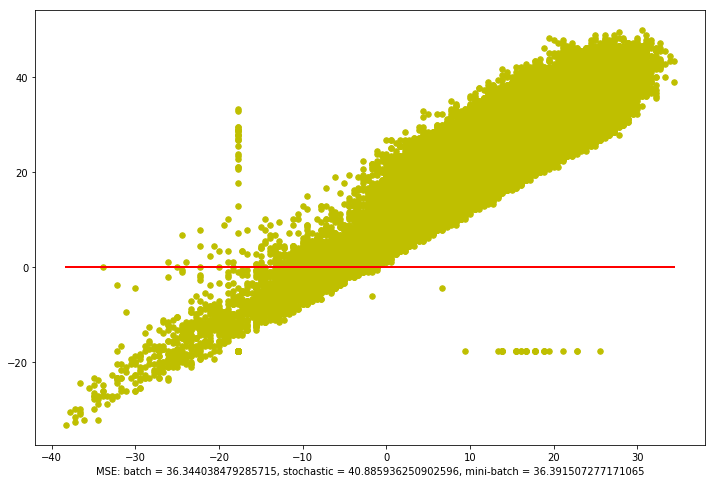

In [25]:
# plot parameters
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x,y,color = "y", marker = "o", s = 30)
x_line = pd.Series([min(train_x),max(train_x)])
x_line.index = range(int(len(x_line)))
ln_batch, = ax.plot(x_line, compute_linear_y_values(x_line,b_start,m_start), color = "m", linewidth=2, 
                    animated = True, label="batch")
ln_stochastic, = ax.plot(x_line, compute_linear_y_values(x_line,b_start,m_start), color = "b", linewidth=2, 
                         animated = True, label="stochastic")
ln_mini_batch, = ax.plot(x_line, compute_linear_y_values(x_line,b_start,m_start), color = "r", linewidth=2, 
                         animated = True,label="mini batch")

# initialisation of plot data
def init_function():
    ln_batch.set_data(x_line, compute_linear_y_values(x_line,b_start,m_start))
    ln_stochastic.set_data(x_line, compute_linear_y_values(x_line,b_start,m_start))
    ln_mini_batch.set_data(x_line, compute_linear_y_values(x_line,b_start,m_start))
    return ln,
    
# the update function of our animation
def update_function(frame):
    y_predicted_batch = compute_linear_y_values(x_line,predictions_batch[frame][0], predictions_batch[frame][1])
    ln_batch.set_ydata(y_predicted_batch)
    y_predicted_stochastic = compute_linear_y_values(x_line,predictions_stochastic[frame][0], predictions_stochastic[frame][1])
    ln_stochastic.set_ydata(y_predicted_stochastic)
    y_predicted_mini_batch = compute_linear_y_values(x_line,predictions_miniBatch[frame][0], predictions_miniBatch[frame][1])
    ln_mini_batch.set_ydata(y_predicted_mini_batch)
    #mse = mean_squared_error(train_y, y_predicted)
    ax.set_xlabel("MSE: batch = {}, stochastic = {}, mini-batch = {}".format(predictions_batch[frame][2],
                                                                            predictions_stochastic[frame][2],
                                                                            predictions_miniBatch[frame][2]))
    return ln,

anim = FuncAnimation(fig, update_function, epochs, blit=False, interval=1,
                              repeat=True, init_func=init_function)

#save the plot as a gif
anim.save('./animations/linear-regression-GradientDescent-Hardcoded_4.gif', dpi=80, writer='imagemagick')

clear_output()

And we display the gif.<br>
<img src="./animations/linear-regression-GradientDescent-Hardcoded_4.gif" />

And lastly, we print a nice plot representing our loss function.

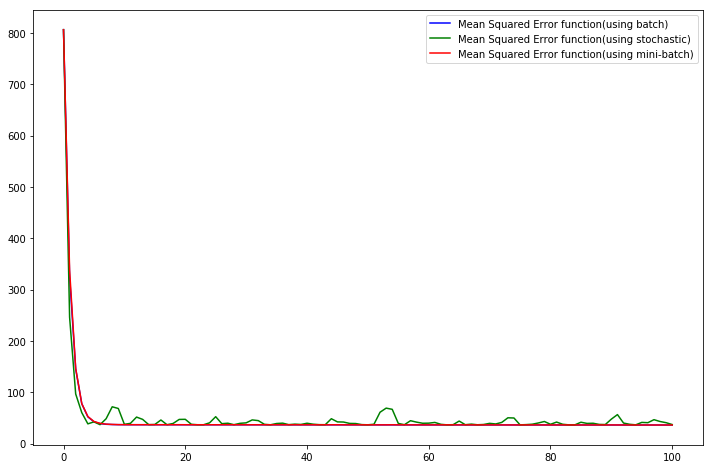

In [26]:
plt.subplots(figsize=(12,8))
x_values = [i for i in range(len(predictions))]
y_values = [m[2] for m in predictions_batch]
plt.plot(x_values, y_values, color = "b", label="Mean Squared Error function(using batch)")
plt.legend()
y_values = [m[2] for m in predictions_stochastic]
plt.plot(x_values, y_values, color = "g", label="Mean Squared Error function(using stochastic)")
plt.legend()
y_values = [m[2] for m in predictions_miniBatch]
plt.plot(x_values, y_values, color = "r", label="Mean Squared Error function(using mini-batch)")
plt.legend()
plt.show()